<a href="https://colab.research.google.com/github/cocoisland/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
df = pd.read_csv(url, header=None, na_values=['?'])

df.isna().sum().count()


16

### Begin of solution answer

In [3]:
# finding data with '?' value. Need to convert to NAN df.replace('?', np.NAN)
dfa = pd.read_csv(url, header=None, 
      names=['A1','A2','A3','A4','A5','A6',
      'A7','A8','A9','A10','A11','A12','A13','A14','A15','A16'])

dfa.describe(include='all')

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
count,690,690,690.000000,690,690,690,690,690.000000,690,690,690.00000,690,690,690,690.000000,690
unique,3,350,NaN,4,4,15,10,NaN,2,2,NaN,2,3,171,NaN,2
top,b,?,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,468,12,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,383
mean,NaN,NaN,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,NaN,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


In [4]:
# A2 and A14 looks like a numerical value feature, 
# but why show up as NaN in describe.
# investigating A2 show up as dtype: object, rather than dtype: float
dfa.A2[:5]

0    30.83
1    58.67
2    24.50
3    27.83
4    20.17
Name: A2, dtype: object

In [5]:
# investigate A1 categorical feature, found '?' value. Need to convert to NAN
dfa.A1.value_counts()   


b    468
a    210
?     12
Name: A1, dtype: int64

In [6]:
# replace '?' values with np.NAN and 
#see than A2 and A12 numerical features has NAN numerical value

dfa=dfa.replace('?',np.NAN)
dfa.isna().sum()


A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [0]:
# instead of dropping NAN numeric feature, convert feature object to numeric
dfa.A2 = pd.to_numeric(dfa.A2)
dfa.A14 = pd.to_numeric(dfa.A14)

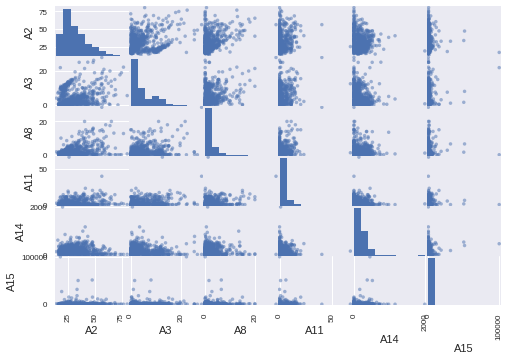

In [8]:
'''
A good way to look at continuous features
Look for correlation and histogram
Look like all are right skewed and some correlation.
'''
pd.plotting.scatter_matrix(dfa);

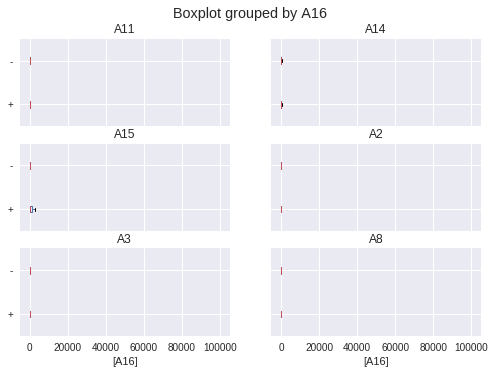

In [9]:
# Using boxplot to see how they vary by class feature
# vert=False, forcing A16 grouping horizontally as observation from
# feature toward all numeric features.
# But couldn't see much. May be, there are outlier influence
dfa.boxplot(vert=False, by='A16');


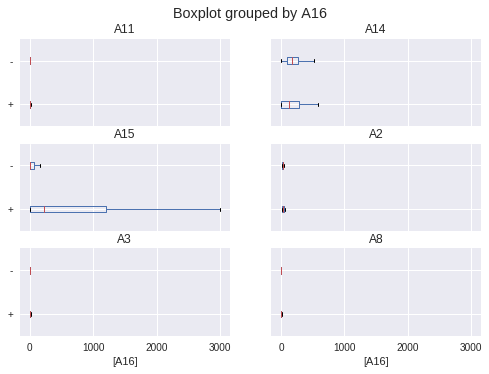

In [10]:
# boxplot automatically select numeric feature to plot.
# filtering out outliers
# A3 outlier stretch the x-axis to 3000, skew the boxplot for features..
# 
dfa.boxplot(vert=False, by='A16', showfliers=False);

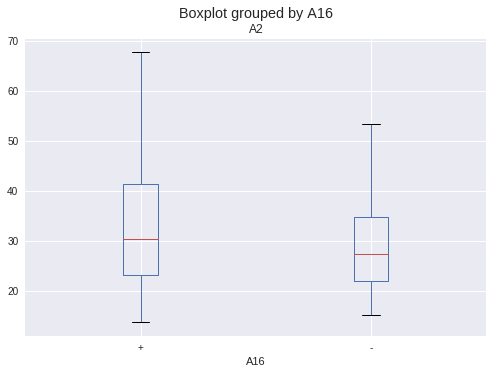

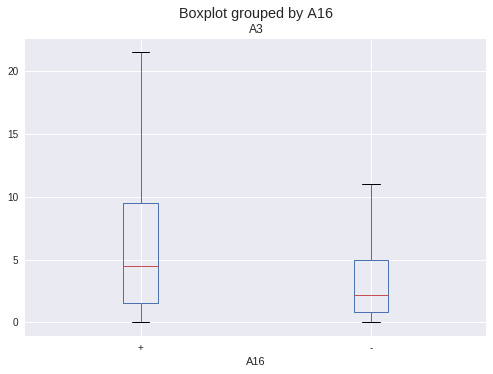

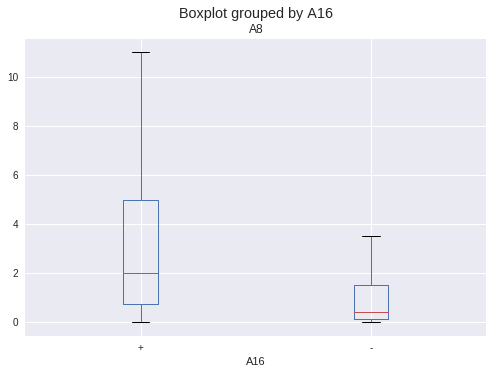

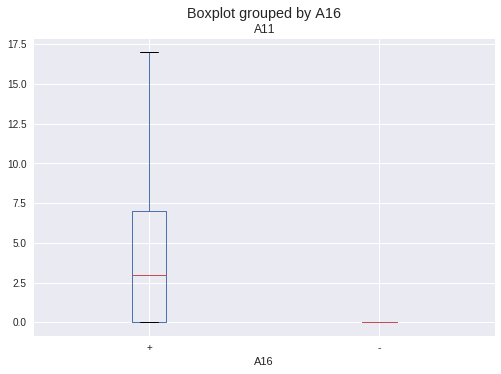

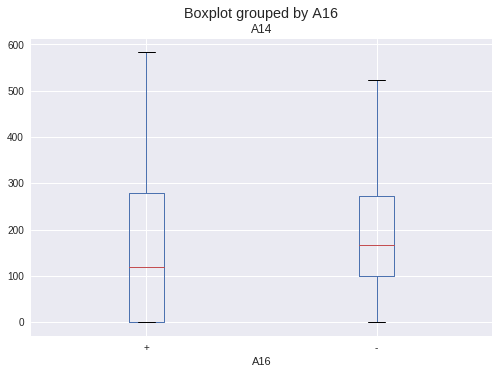

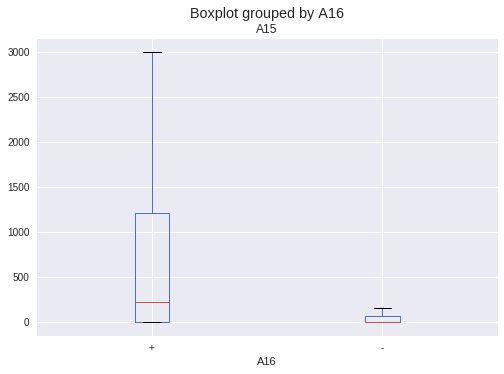

In [11]:
# Have to boxplot one column feature against A16 class one by one.

# A2 grouped by A16 = median '+' is about equal to '-'.
# A3 grouped by A16 = '+' double '-'. Positive credit influence.
# A8 grouped by A16 = Many credit approval. A8 is highly favorable to approval.
# A11 = No negative credit or not enough data.
# A14 = credit about the same as no credit.
cols = ['A2','A3','A8','A11','A14','A15']

boxplots = [ dfa.boxplot(column=col, by='A16', showfliers=False) for col in cols ]

In [0]:
dfa_pos = dfa[ dfa.A16 == '+']
dfa_neg = dfa[ dfa.A16 == '-']

In [20]:
dfa_pos.shape

(307, 16)

In [25]:
from scipy.stats import ttest_ind

# pick A8 the most credit favourable to test
# pvalue less than 0.01
ttest_ind(dfa_pos.A8, dfa_neg.A8)


Ttest_indResult(statistic=8.935819983773698, pvalue=3.6710537401601785e-18)

In [21]:
# result show NaN. Need to remove NaN because it is affected the result.
ttest_ind(dfa_pos.A14, dfa_neg.A14)

Ttest_indResult(statistic=nan, pvalue=nan)

In [22]:
# nan_policy
ttest_ind(dfa_pos.A14, dfa_neg.A14, nan_policy='omit')

Ttest_indResult(statistic=-2.6358251986645476, pvalue=0.008586135473979569)

### Analysis Interpretation Solution for Continuous feature:

* A8 had extremely large and positive test statistic, suggesting that it is representing a characteristic that enable people to strongly get credit approved than fail to get approved.

* A14 had significant but smaller negative test statistic, suggesting it is representing a characteristic that common and extreme amongst people who fail to get credit approved.


In [29]:
# For categorical features, crosstab each one by one with A16 credit/no credit
category_features = [dfa.A1, dfa.A4, dfa.A5, dfa.A6, dfa.A7, dfa.A9, dfa.A10,
                    dfa.A12, dfa.A13]

crosstabs= [pd.crosstab(dfa.A16, f ) for f in category_features]
crosstabs[0]

A1,a,b
A16,,
+,98,206
-,112,262


In [30]:
# Apply chisquare to the crosstabs value
from scipy.stats import chisquare

for crosstab in crosstabs:
  print(crosstab)
  print(chisquare(crosstab, axis=None))
  print('\n\n')

A1     a    b
A16          
+     98  206
-    112  262
Power_divergenceResult(statistic=108.00589970501474, pvalue=2.947455715876286e-23)



A4   l    u    y
A16             
+    2  256   45
-    0  263  118
Power_divergenceResult(statistic=637.561403508772, pvalue=1.545055409454076e-135)



A5     g  gg    p
A16              
+    256   2   45
-    263   0  118
Power_divergenceResult(statistic=637.561403508772, pvalue=1.545055409454076e-135)



A6   aa   c  cc   d   e  ff   i  j   k   m   q  r   w   x
A16                                                      
+    19  62  29   7  14   7  14  3  14  16  51  2  33  32
-    35  75  12  23  11  46  45  7  37  22  27  1  31   6
Power_divergenceResult(statistic=393.32011747430255, pvalue=1.1436746143425653e-66)



A7   bb  dd  ff   h  j  n  o    v  z
A16                                 
+    25   2   8  87  3  2  1  169  6
-    34   4  49  51  5  2  1  230  2
Power_divergenceResult(statistic=1855.9427312775329, pvalue=0.0)



A9     f    t

### Analysis Interpretation for Categorical features
*Chisquare by itself doesn't tell us much, so we have to look at the counts themselves*

* A7 had extreme test statistic(pvalue=0), due to many category value and  many of them  are very small. The more category value, the more chisquare exaggerate the effect by the squaring power.
* A9 is a simple t/f category with more even data amount but extreme distribution, with 284 't' getting credit vs 306 'f' not getting credit.
* A12 is t/f like A9, but less extreme. Both credit and non-credit have more f than t.

### End of Solution

In [0]:
df.dropna(inplace=True)

In [56]:
#  convert missing data='?' into NAN, correctly identify feature as numeric from object.
df.describe()


,1,2,7,10,13,14
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [57]:
df.describe(exclude=np.number)

,0,3,4,5,6,8,9,11,12,15
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" between them and the class label, and apply the Chi-squared test to them. There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end. This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
# Separate by approve status
df_plus = df[ (df[15] == '+') ]
df_minus= df[ df[15] == '-']

In [121]:
# ttest independent for Approved continuous features
# Any relationship between approved and disapproved continuous features
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

cont_features_ind = pd.DataFrame(columns=['features','statistic_ind','pvalue_ind'])

i=0
for f in [1,2,7,10,13,14]:
  t_ind, p_ind = ttest_ind(df_plus[f], df_minus[f])
  cont_features_ind.loc[i] = [str(f),t_ind, p_ind]
  i = i + 1
  
cont_features_ind

,features,statistic_ind,pvalue_ind
0,1,4.675662,3.563671e-06
1,2,5.400813,9.310154e-08
2,7,9.002392,2.407924e-18
3,10,11.336965,2.586465e-27
4,13,-2.182219,2.945010e-02
5,14,4.475370,9.003916e-06


In [0]:
df=df.replace('+',1)
df=df.replace('-',0)

In [122]:
# ttest independence test on Approved and Non-approved continuous features
cont_features_ind2 = pd.DataFrame(columns=['features','statistic_ind','pvalue_ind'])

i=0
for f in [1,2,7,10,13,14]:
  t_ind, p_ind = ttest_ind(df[15], df[f])
  cont_features_ind2.loc[i] = [str(f),t_ind, p_ind]
  i = i + 1
  
cont_features_ind2

,features,statistic_ind,pvalue_ind
0,1,-66.965808,0.000000e+00
1,2,-22.137059,1.932402e-92
2,7,-13.430347,1.300827e-38
3,10,-10.485814,9.386469e-25
4,13,-27.316551,2.715155e-130
5,14,-4.929099,9.322324e-07


In [123]:
df.describe()

,1,2,7,10,13,14,15
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,31.503813,4.829533,2.244296,2.502297,180.359877,1013.761103,0.453292
std,11.838267,5.027077,3.371120,4.968497,168.296811,5253.278504,0.498195
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.040000,0.165000,0.000000,73.000000,0.000000,0.000000
50%,28.420000,2.835000,1.000000,0.000000,160.000000,5.000000,0.000000
75%,38.250000,7.500000,2.625000,3.000000,272.000000,400.000000,1.000000
max,76.750000,28.000000,28.500000,67.000000,2000.000000,100000.000000,1.000000


In [125]:
# Ttest dependence for Approved and Non-Approved
for i in [1,2,7,10,13,14]:
  s,p= ttest_rel(df[15],df[i])
  print('Feature category(0,{}) statistic={} and pvalue={}'.format(i,s,p))

Feature category(0,1) statistic=-67.4787207454447 and pvalue=2.540365191314492e-296
Feature category(0,2) statistic=-22.601150021728994 and pvalue=5.768331023080983e-84
Feature category(0,7) statistic=-14.127360654431145 and pvalue=9.963041537198473e-40
Feature category(0,10) statistic=-10.935900684577518 and pvalue=1.1269620554090349e-25
Feature category(0,13) statistic=-27.309662563888832 and pvalue=4.553284777434871e-110
Feature category(0,14) statistic=-4.929179898992901 and pvalue=1.048577025686764e-06


In [124]:
# Testing dependence relationship between feature 1 and 10
stats.ttest_rel(df[15],df[10])

Ttest_relResult(statistic=-10.935900684577518, pvalue=1.1269620554090349e-25)

In [86]:
# Dependence between 2,7
stats.ttest_rel(df[],df[7])

Ttest_relResult(statistic=12.845909604580136, pvalue=7.883639641108741e-34)

In [112]:
# Dependence between 13 and 14
stats.ttest_rel(df[13],df[14])

Ttest_relResult(statistic=26.46938234915939, pvalue=2.0769437865567574e-105)

In [88]:
df.describe(exclude=np.number)

,0,3,4,5,6,8,9,11,12,15
count,653,653,653,653,653,653,653,653,653,653
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,450,499,499,133,381,349,366,351,598,357


In [0]:
from scipy.stats import chisquare

In [106]:
# Applying chisquare for features with two category values
cat_2=pd.crosstab(df[0],[df[8],df[9],df[11]])
s,p=chisquare(cat_2, axis=None)
print('Feature category(0,8,9,11) statistic {} and pvalue {}'.format(s,p))

Feature category(0,8,9,11) statistic 264.24349157733536 and pvalue 1.4328099132249606e-47


In [116]:
for i in [8,9,11]:
  cross= pd.crosstab(df[0],df[i])
  s,p = chisquare(cross, axis=None)
  print('Feature category(0,{}) statistic={} and pvalue={}'.format(i,s,p))

Feature category(0,8) statistic=96.5436447166922 and pvalue=8.600948714043167e-21
Feature category(0,9) statistic=110.2771822358346 and pvalue=9.564956912560129e-24
Feature category(0,11) statistic=97.364471669219 and pvalue=5.7293804384309325e-21


In [108]:
# Applying chisquare for features with three category values
cat_3 = pd.crosstab(df[0],[df[3],df[4],df[12]])
s,p=chisquare(cat_3, axis=None)
print('Feature category(3,4,12): statistic={}, pvalue={}'.format(s,p))

Feature category(3,4,12): statistic=2105.814701378254, pvalue=0.0


In [117]:
for i in [3,4,12]:
  cross = pd.crosstab(df[0],df[i])
  s,p = chisquare(cross, axis=None)
  print('Feature category(0,{}) statistic={} and pvalue={}'.format(i,s,p))


Feature category(0,3) statistic=759.7748851454825 and pvalue=5.814867862621082e-162
Feature category(0,4) statistic=759.7748851454826 and pvalue=5.814867862620749e-162
Feature category(0,12) statistic=1214.3231240428793 and pvalue=2.3199396221271546e-260


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

#### For Continuous Features  with Class Approved  using Ttest independence, ttest_ind
Features 1,2,7,10,14 has pvalue less than 0.01 percent. There are high confidence that  relationship existed between the approved or non-approved cases.

## Feature 13 has pvalue=0.02, greater than 0.01 percent. There is no relationship between approved.

#### For Continuous Features with class Approved and Non-Approved using Ttest indepennce
## Feature 1 has pvalue=0, null hypothesis definitely true. 


### For Continuous features, testing dependency using ttest_rel
Relationship features between {1,10}, {2,7}, {13,14}, all return pvalue < 0.01 .
In fact ttest_rel gives  pvalue<0.01 for all continuous features.
Not sure when to use ttest_rel ?

####  For Categorical features with Class Approved/Non-approved, using ChiSquare
Features {0,8,9,11} has pvalue < 0.01, gives high confidence these features has relationship to approved or non-approved cases.

## Features {3,4,12} has pvalue=0.0, has NO relationship to approved or non-approved cases.
Random chances for approval or non-approval for features {3,4,12}

## Conclusion Result
Feature 1 has relationship with Approved or Not approved cases. Random chance.

Feature {3,4,12} together has no relationship with Approved or Non approved case. Random chance.